# Predicting Heart disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

The approch is as follow:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# Preparing the tool

We will be using Pandas, Numpy and Matplotlib for data anaylysis and manipulation

In [103]:
# Importing the tools we need

# Regular EDA and Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle

# Make plots appear inside the notebook
%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

# Loading the Data

In [ ]:
df = pd.read_csv("heart-disease.csv")
df.shape

# Data Exploration (EDA)
The goal is to find out more about data and to become a subject matter expert on the database you are working with

In [ ]:
# finding out how many rows exists for each class
df.target.value_counts()

In [ ]:
df.target.value_counts().plot(kind = 'bar', color=['red', 'blue']);

In [ ]:
# Checking for any null values
df.isna().sum()

In [ ]:
# Heart disease count according to sex of patients
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['red', 'blue']);
plt.title("Heart disease count according to sex of patients")
plt.xlabel("0 = No, 1 = Yes")
plt.ylabel("Patients")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [ ]:
# Age vs. Max heart rate for heart disease
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color='red');
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color='blue');

plt.title("Heart disease as a function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Not Healthy", "Healthy"])

In [ ]:
# Making a correlatoin matrix
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt='.2f', cmap='coolwarm');

# Training the model

In [ ]:
# Splitting the data into X and Y
X = df.drop("target", axis = 1)
Y = df.target

In [ ]:
# Splitting the data into train and test sets
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)
model_scores

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind='bar');
plt.xticks(rotation = 0)

# Refining the models

In [ ]:
# Hyperparameter Tuning for KNN model by hand
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, Y_train)
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))

In [ ]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1,21))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

In [ ]:
# Hyperparameter Tuning for Logistic Regression and Random Forest Classifier model by RandamizedSearchCV

lg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [42]:
# Logistic Regression
np.random.seed(42)

rs_lr = RandomizedSearchCV(
    LogisticRegression(), 
    param_distributions=lg_grid, 
    cv=5, n_iter=20, 
    verbose=True
)

rs_lr.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fol

In [43]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': np.float64(0.20433597178569418)}

In [44]:
rs_lr.score(X_test, Y_test)

0.8852459016393442

In [45]:
# Random Forest Classifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(
    RandomForestClassifier(), 
    param_distributions=rf_grid, 
    cv=5, n_iter=20, 
    verbose=True
)

rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-valid

In [46]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [47]:
rs_rf.score(X_test, Y_test)

0.8688524590163934

In [48]:
# Hyperparameter Tuning for Logistic Regression and Random Forest Classifier model by GridSearchCV
lg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

gs_lr = GridSearchCV(
    LogisticRegression(),
    param_grid=lg_grid,
    cv=5,
    verbose=True
)

gs_lr.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the

In [49]:
gs_lr.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [50]:
gs_lr.score(X_test, Y_test)

0.8852459016393442

## Evaluating the tunned ML classifier, beyond accuracy
* ROC and AUC Curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-score

In [58]:
Y_preds = gs_lr.predict(X_test)
Y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [67]:
fpr, tpr, threshold = roc_curve(y_true=Y_test, y_score=Y_preds)

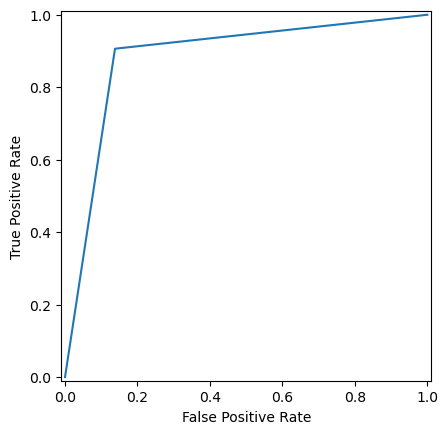

In [74]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot();

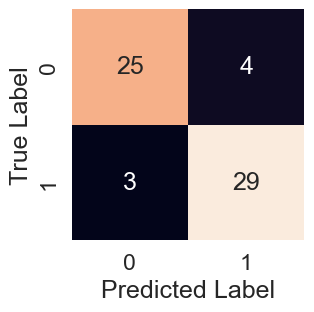

In [78]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax =  sns.heatmap(
        confusion_matrix(y_test, y_preds),
        annot=True,
        cbar=False
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(Y_test, Y_preds)

In [79]:
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross validation

In [80]:
gs_lr.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [81]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [82]:
# cross-validation accuracy
cv_acc = cross_val_score(clf, X, Y, cv = 5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [86]:
cv_acc = cv_acc.mean()
cv_acc

np.float64(0.8215873015873015)

In [87]:
# cross-validation precision
cv_precision = cross_val_score(clf, X, Y, cv = 5, scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [88]:
cv_precision = cv_precision.mean()
cv_precision

np.float64(0.8215873015873015)

In [89]:
# cross-validation recall
cv_recall = cross_val_score(clf, X, Y, cv = 5, scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [90]:
cv_recall = cv_recall.mean()
cv_recall

np.float64(0.9272727272727274)

In [91]:
# cross-validation F1-score
cv_f1 = cross_val_score(clf, X, Y, cv = 5, scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [92]:
cv_f1 = cv_f1.mean()
cv_f1

np.float64(0.8705403543192143)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1')])

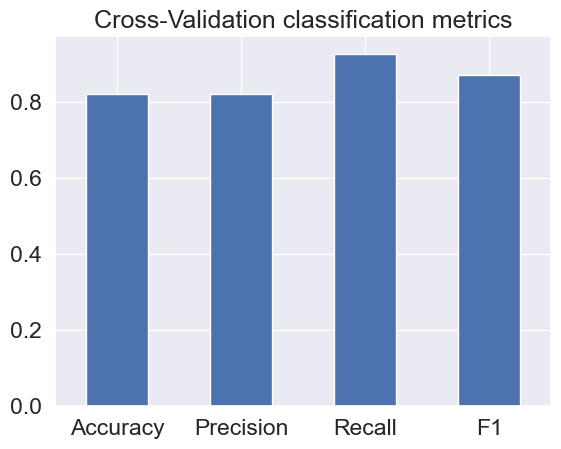

In [95]:
cv_metrics = pd.DataFrame(
    {
        "Accuracy": cv_acc,
        "Precision": cv_precision,
        "Recall": cv_recall,
        "F1": cv_f1
    },
    index=[0]
)

cv_metrics.T.plot.bar(title = "Cross-Validation classification metrics", legend = False);
plt.xticks(rotation=0)

## Feature Importance
Which feature contributed most to the outcomes of the model and how did thet contribute ?

In [98]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train, Y_train);

In [99]:
clf.coef_

array([[ 0.00316728, -0.86044654,  0.66067039, -0.01156993, -0.00166374,
         0.04386106,  0.3127585 ,  0.02459361, -0.60413082, -0.56862801,
         0.45051629, -0.63609898, -0.67663371]])

In [101]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672803473471746),
 'sex': np.float64(-0.8604465397334717),
 'cp': np.float64(0.6606703933230701),
 'trestbps': np.float64(-0.011569932224142465),
 'chol': np.float64(-0.0016637439444753457),
 'fbs': np.float64(0.043861055458486765),
 'restecg': np.float64(0.31275849953638685),
 'thalach': np.float64(0.0245936131980898),
 'exang': np.float64(-0.604130820900716),
 'oldpeak': np.float64(-0.5686280121446481),
 'slope': np.float64(0.45051628712277775),
 'ca': np.float64(-0.6360989818014864),
 'thal': np.float64(-0.6766337106855729)}

<Axes: title={'center': 'Feature Importance'}>

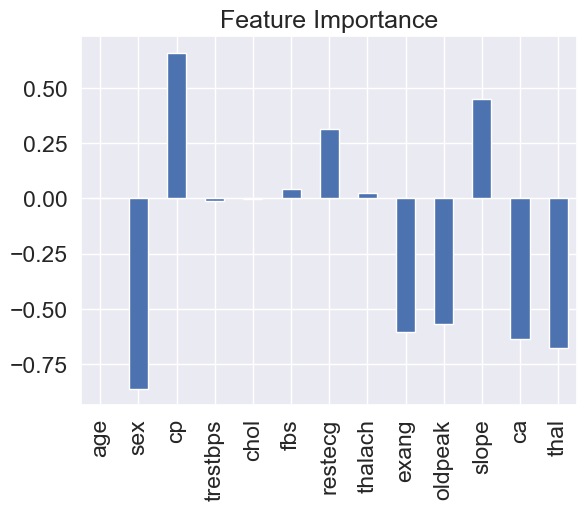

In [102]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [107]:
# Exporting a model
filename = 'heart-disease-mode.pkl'

with open(filename, 'wb') as file:
    pickle.dump(clf, file)